In [1]:
#neural network classification


In [2]:
import sklearn


In [3]:
from sklearn.datasets import make_circles

#making 1000 samples

n_samples=1000

#create circles

x,y=make_circles(n_samples, noise=0.03, random_state=42)


In [4]:
len(x),len(y)

(1000, 1000)

In [5]:
print(f"first 5 sample of x are: {x[:5]} ")
print(f"first 5 sample of y are: {y[:5]} ")

first 5 sample of x are: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]] 
first 5 sample of y are: [1 1 1 1 0] 


In [7]:
import pandas as pd
circles=pd.DataFrame({'x1': x[:],
                     'y1': x[:] })
circles


#here is error, coz in x[:] all no. are trying to be inside

ValueError: Per-column arrays must each be 1-dimensional

In [8]:
import pandas as pd
circles=pd.DataFrame({'x1': x[:,0],
                     'y1': x[:,1] ,
                      'label': y})
circles


,x1,y1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [9]:
circles.head(10)

,x1,y1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


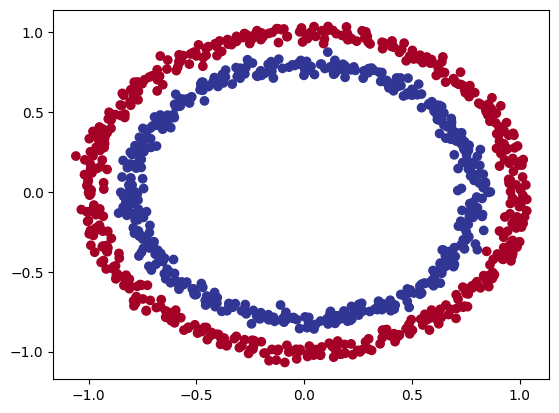

In [10]:
#visualize
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],y=x[:,1],c=y,
            cmap=plt.cm.RdYlBu)           #cm=colormap


In [11]:
#checking the input and output sets

x.shape, y.shape  #(1000,2) means 1000 samples of 2 features and (1000,) means 1000 samples with no features ie scaler


((1000, 2), (1000,))

In [12]:
x_sample=x[0]
y_sample=y[0]
print(f'values of one sample of x: {x_sample} and same for y: {y_sample}')
print(f'shapes values of one sample of x: {x_sample.shape} and same for y: {y_sample.shape}')

values of one sample of x: [0.75424625 0.23148074] and same for y: 1
shapes values of one sample of x: (2,) and same for y: ()


In [13]:
#turning data into tensors and create train nd test splits

import torch
torch.__version__

'2.2.1+cu121'

In [14]:
type(x),x.dtype,x[:5],y[:5]

(numpy.ndarray,
 dtype('float64'),
 array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [15]:
#turning data into tensors

x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)   #torch.float= converts data into float 32
x[:5],y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [16]:
type(x), x.dtype

(torch.Tensor, torch.float32)

In [17]:
#split data into train and test set
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,#0.2 means 20% of data will be test and 80 will be train
                                                random_state=42)


In [18]:
len(x_train),len(x_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [19]:
#building a model
#lets buid a model to classify blue and red dots


In [20]:
#setup device to run in either on cpu or gpu

In [21]:
import torch
from torch import nn
 #make devic agnostic code ....ie choose runtime cpu or gpu

device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [22]:
x_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [23]:
#now create a modelL
#1. subclass "nn.module"
#2. create 2 'nn.linear()'
#3.define forward method
#4. instiate  and instance of our model class and send it to the target

#1.


In [24]:
#1
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=5)

    self.layer2=nn.Linear(in_features=5,out_features=1)  #out feature of laer 1 must match with layer 2

  def forward(self,x):
    return self.layer2(self.layer1(x))

model_0=CircleModelV0()
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
# now for asigning the model to device ie cpu or gpu
model_0.to(device)

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [27]:
#lets replicate the model above using nn.sequential

model_0=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

#this is another way of creating the model, both circlemodelV0 and this do same, for further more see video at 9.48.37


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [28]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-5.7728e-01, -4.7672e-01],
                      [-5.7697e-01,  3.1884e-01],
                      [-5.4235e-01,  1.7016e-01],
                      [-3.1703e-04, -1.4067e-01],
                      [-2.0948e-01, -5.2412e-01]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.0502, -0.5020,  0.6091, -0.5049,  0.4790], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1868, -0.4032, -0.2656, -0.0180,  0.2827]], device='cuda:0')),
             ('1.bias', tensor([-0.1050], device='cuda:0'))])

In [29]:
#making predictions   continue frome 9.52

In [30]:
with torch.inference_mode():

  untrained_preds=model_0(x_test.to(device))
print(f"length of predictions: {len(untrained_preds)} and shape: {untrained_preds.shape}")
print(f"length of test samples: :{len(x_test)} and shape: {x_test.shape}")
print(f"first 10 preds are: {torch.round(untrained_preds[:10])}")
print(f"first 10 labels ie reasults are: {y[:10]}")

#here torch.round is used to round the value of predictions, try removing torch.round and see how is the output first

length of predictions: 200 and shape: torch.Size([200, 1])
length of test samples: :200 and shape: torch.Size([200, 2])
first 10 preds are: tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [-0.]], device='cuda:0')
first 10 labels ie reasults are: tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.])


In [31]:
#setting up loss function and optimizer

#which loss fn or optimizer shouldu use


In [32]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)



In [33]:
#now lets define function to calculate the accuracy

def accuracy_fn(y_true, y_preds):
  correct=torch.eq(y_true,y_preds).sum().item()
  acc=correct/len(y_preds)*100
  return acc

In [34]:
#training model :ie build the training loop

In [35]:
model_0.eval()
with torch.inference_mode():

  y_logits=model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.2461],
        [-0.1438],
        [-0.1557],
        [-0.2732],
        [ 0.4132]], device='cuda:0')

In [36]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [37]:
y_preds_prob=torch.sigmoid(y_logits)
y_preds_prob

tensor([[0.4388],
        [0.4641],
        [0.4612],
        [0.4321],
        [0.6019]], device='cuda:0')

In [38]:
torch.round(y_preds_prob)
#here we used sigmodi before .round because sigmoid is used to convert it into the suitable value of y_test and round is used for
#y_pred_prob>=.5 ==1 else 0

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]], device='cuda:0')

In [39]:
#find the predicted labels
y_preds=torch.round(y_preds_prob)

#in full, (logits->pred prob->pred labels)
y_preds_labels=torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

#getting rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 1.], device='cuda:0')

In [40]:
y_test[:5]




tensor([1., 0., 1., 0., 1.])

In [41]:
#building a training and testing loops:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=1000

#put the data to target device
x_train,y_train=x_train.to(device),y_train.to(device)

x_test,y_test=x_test.to(device),y_test.to(device)

#building the training and testing loop
for epoch in range(epochs):
  #training
  model_0.train()

  #forward pass
  y_logits=model_0(x_train).squeeze()
  y_preds=torch.round(torch.sigmoid(y_logits))

  #calculate loss/accuracy
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_preds=y_preds)

  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward ie backward propagation
  loss.backward()

  #optimizer step(gradient decent)
  optimizer.step()

  #testing
  model_0.eval()

  with torch.inference_mode():
  #forward pass
    test_logits=model_0(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #calculate  test loss/accuracy
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_preds=test_pred)

  if epoch%10==0:
    print(f"epoch: {epoch} |loss:{loss:.5f}, acc: {acc:.2f}%| test loss: {test_loss:.5f},test acc : {test_acc:.2f}%")




epoch: 0 |loss:0.70621, acc: 50.00%| test loss: 0.70406,test acc : 53.00%
epoch: 10 |loss:0.70584, acc: 49.75%| test loss: 0.70376,test acc : 53.00%
epoch: 20 |loss:0.70550, acc: 49.75%| test loss: 0.70347,test acc : 52.50%
epoch: 30 |loss:0.70516, acc: 49.75%| test loss: 0.70320,test acc : 53.00%
epoch: 40 |loss:0.70485, acc: 49.75%| test loss: 0.70294,test acc : 53.00%
epoch: 50 |loss:0.70455, acc: 49.75%| test loss: 0.70269,test acc : 53.00%
epoch: 60 |loss:0.70426, acc: 49.75%| test loss: 0.70245,test acc : 53.50%
epoch: 70 |loss:0.70399, acc: 49.88%| test loss: 0.70222,test acc : 53.00%
epoch: 80 |loss:0.70372, acc: 49.88%| test loss: 0.70200,test acc : 52.50%
epoch: 90 |loss:0.70347, acc: 49.88%| test loss: 0.70179,test acc : 51.00%
epoch: 100 |loss:0.70322, acc: 49.88%| test loss: 0.70159,test acc : 51.00%
epoch: 110 |loss:0.70299, acc: 50.00%| test loss: 0.70139,test acc : 50.50%
epoch: 120 |loss:0.70277, acc: 50.12%| test loss: 0.70120,test acc : 50.50%
epoch: 130 |loss:0.7025

In [42]:
##another dayyyyyy

In [43]:
#make predictions and evaluate the model
#currently our model isnt learning anything


In [44]:
import requests
from pathlib import Path

#download helper function from learn pytorch repo

if Path("helper_functions.py").is_file():
  print("helper fn.py already skip,skipping download")

else:
  print("downloading helper_fn.py")

  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper fn.py already skip,skipping download


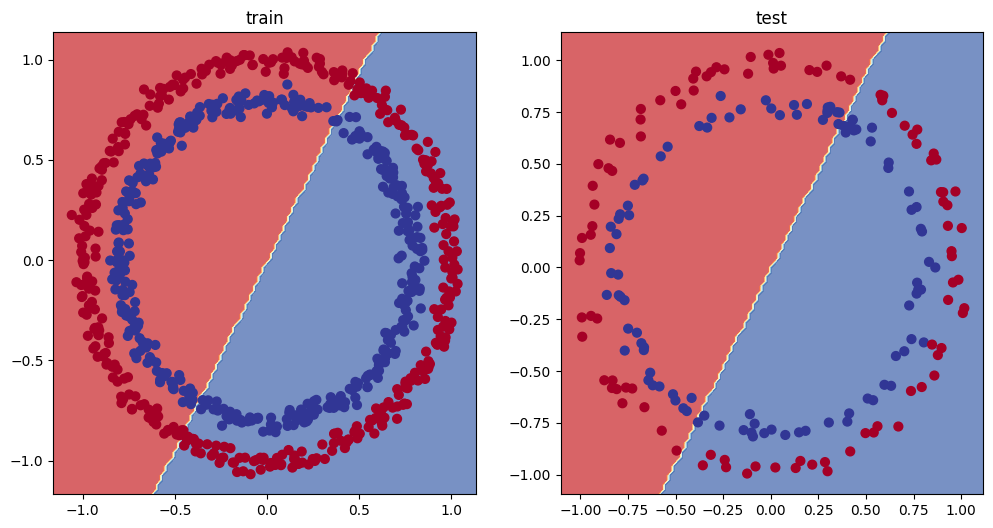

In [45]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,x_test,y_test)

In [46]:
#imporving the model(from a model perspective):it can be done by adding more layers
#another way is to add more hidden units


In [47]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=10)

    self.layer_2=nn.Linear(in_features=10, out_features=10)

    self.layer_3=nn.Linear(in_features=10, out_features=1)

  def forward(self,x):
      # z=self.layer_1(x)
      # z=self.layer_2(z)
      # z=self.layer_3(z)

    return self.layer_3(self.layer_2(self.layer_1(x)))  #this way of writing operation leverages speed ups where possible behind the scenes

model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [48]:
#create the loss fn
loss_fn=nn.BCEWithLogitsLoss()

#create the optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)




In [49]:
#write training and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#train for longer
epochs=1000
#put data on the target device
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)


for epoch in range(epochs):
  #training
  model_1.train()
  #1.forward pass
  y_logits=model_1(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))  #logits->pred probabilities->predictions labels
  #calculate the loss/acc
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_preds=y_preds)

  #3 optimizer zero grad
  optimizer.zero_grad()

  #4.loss backward ie backward propagation
  loss.backward()

  #5. optimizer step (gradient descent)
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    #1 forward pass
    test_logits=model_1(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    #calculate the losss
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_preds=test_pred)

    #print out whats happening
    if epoch %100==0:
      print(f"epoch:{epoch} | loss:{loss:.5f}, acc:{acc:.2f} | test loss: {test_loss:.5f} , test acc:{test_acc:.2f}%")

epoch:0 | loss:0.69396, acc:50.38 | test loss: 0.69261 , test acc:51.00%
epoch:100 | loss:0.69305, acc:50.38 | test loss: 0.69379 , test acc:48.00%
epoch:200 | loss:0.69299, acc:50.38 | test loss: 0.69437 , test acc:46.00%
epoch:300 | loss:0.69298, acc:50.38 | test loss: 0.69458 , test acc:45.00%
epoch:400 | loss:0.69298, acc:50.38 | test loss: 0.69465 , test acc:46.00%
epoch:500 | loss:0.69298, acc:50.38 | test loss: 0.69467 , test acc:46.00%
epoch:600 | loss:0.69298, acc:50.38 | test loss: 0.69468 , test acc:46.00%
epoch:700 | loss:0.69298, acc:50.38 | test loss: 0.69468 , test acc:46.00%
epoch:800 | loss:0.69298, acc:50.38 | test loss: 0.69468 , test acc:46.00%
epoch:900 | loss:0.69298, acc:50.38 | test loss: 0.69468 , test acc:46.00%


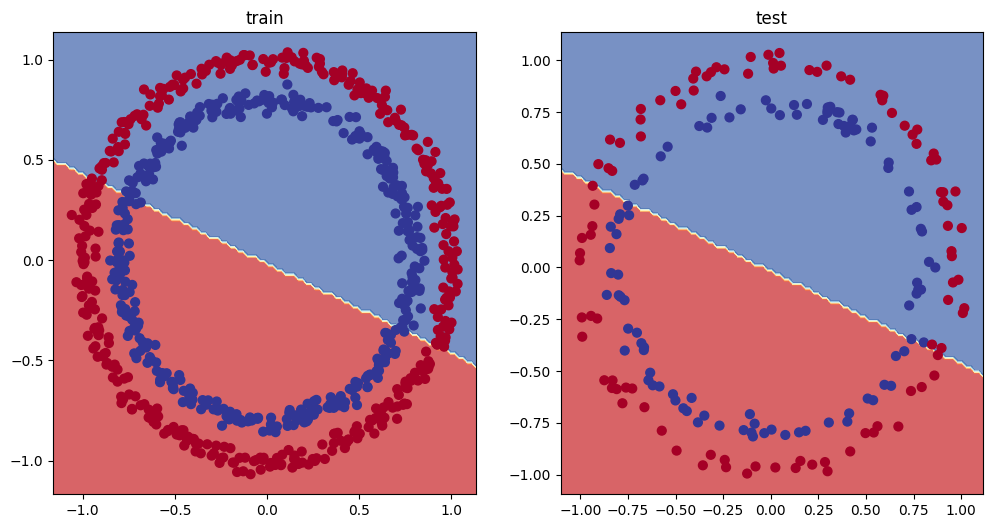

In [50]:
#plot the decision boundary:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,x_test,y_test)

In [51]:
#prepare the data to see if our model can fit a straight line   11.29


In [52]:
#create some data(same as notebook 1)

w=0.7
b=0.3
start=0
end=1
step=0.01

#create data
x_reg=torch.arange(start,end,step).unsqueeze(dim=1)
y_reg=w*x_reg+b  #linear reg formula (without epsilon()
print(len(x_reg))
x_reg[:5],y_reg[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [53]:
#create train and test split
train_split=int(0.8*len(x_reg))
x_train_reg,y_train_reg=x_reg[:train_split],y_reg[:train_split]

x_test_reg,y_test_reg=x_reg[train_split:],y_reg[train_split:]

len(x_train_reg),len(y_train_reg),len(x_test_reg),len(y_test_reg)

(80, 80, 20, 20)

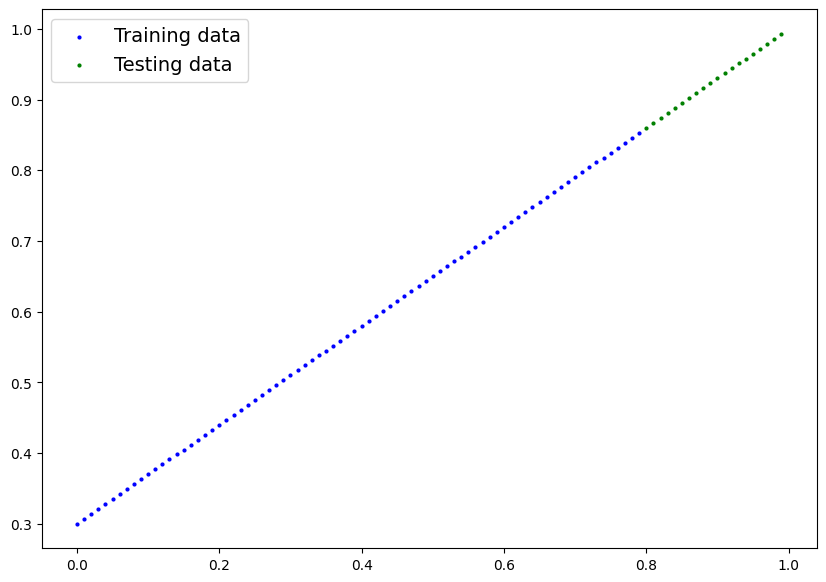

In [54]:
from helper_functions import plot_predictions  #this line was not important, because it was already imported previously, but just for clearing
plot_predictions(train_data=x_train_reg,
                train_labels=y_train_reg,
                test_data=x_test_reg,
                test_labels=y_test_reg);

In [55]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [56]:
#adjusting model 1 to fit the setraight line

In [57]:
#same architectue as model 1 but suin nn.sequentioal

model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),

    nn.Linear(in_features=10,out_features=10),

    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [66]:
#loss and optimizer
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [67]:
#train and test
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set the no. of epochs
epochs=1000
#put data in target device
x_train_reg,y_train_reg=x_train_reg.to(device),y_train_reg.to(device)
x_test_reg,y_test_reg=x_test_reg.to(device),y_test_reg.to(device)


#training
for epoch in range(epochs):
  y_pred=model_2(x_train_reg)
  loss=loss_fn(y_pred,y_train_reg)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(x_test_reg)
    test_loss=loss_fn(test_pred,y_test_reg)



  #print out whats happening

  if epoch%100==0:
    print(f"epoch: {epoch} | loss: {loss:.5f} | test loss: {test_loss:.5f}")

epoch: 0 | loss: 0.06466 | test loss: 0.12597
epoch: 100 | loss: 0.00743 | test loss: 0.00093
epoch: 200 | loss: 0.00621 | test loss: 0.00123
epoch: 300 | loss: 0.00619 | test loss: 0.00116
epoch: 400 | loss: 0.00617 | test loss: 0.00094
epoch: 500 | loss: 0.00646 | test loss: 0.00138
epoch: 600 | loss: 0.00614 | test loss: 0.00110
epoch: 700 | loss: 0.00612 | test loss: 0.00103
epoch: 800 | loss: 0.00641 | test loss: 0.00149
epoch: 900 | loss: 0.00639 | test loss: 0.00118


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

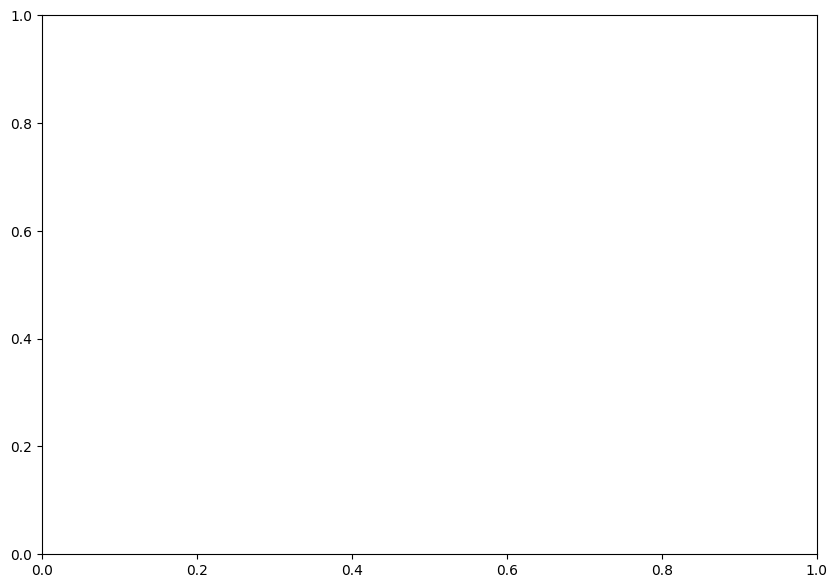

In [68]:
#evaluating our models predictions on st line data

#turn on evaluation mode

model_2.eval()

#make predictions (inference)
with torch.inference_mode():
  y_preds=model_2(x_test_reg)

  #plot data and predictions

plot_predictions(train_data=x_train_reg,
                 train_labels=y_train_reg,
                 test_data=x_test_reg,
                 test_labels=y_test_reg,
                 predictions=y_preds)


#here will be error, since we used plot predictions fn and it used numpy bt we need tensor

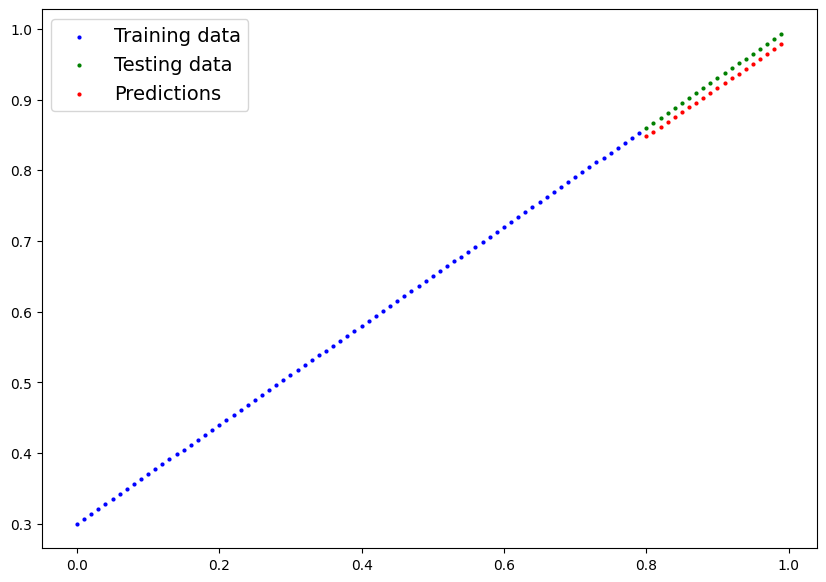

In [70]:
#evaluating our models predictions on st line data

#turn on evaluation mode

model_2.eval()

#make predictions (inference)
with torch.inference_mode():
  y_preds=model_2(x_test_reg)

  #plot data and predictions

plot_predictions(train_data=x_train_reg.cpu(),
                 train_labels=y_train_reg.cpu(),
                 test_data=x_test_reg.cpu(),
                 test_labels=y_test_reg.cpu(),
                 predictions=y_preds.cpu())



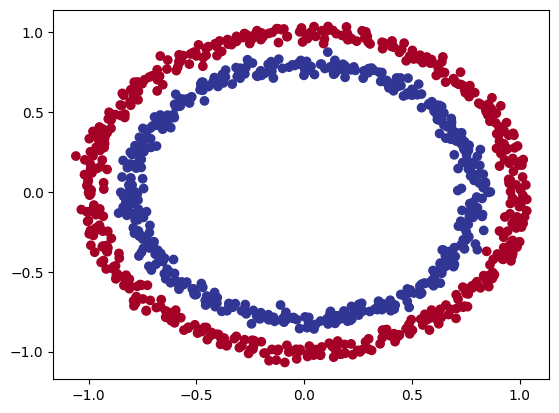

In [73]:
#recreating non linear data(red and blue circles)

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples=1000


x,y=make_circles(n_samples, noise=0.03, random_state=42)

#plt.scatter()
plt.scatter(x=x[:,0],y=x[:,1],c=y,
            cmap=plt.cm.RdYlBu)

In [74]:
#convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import  train_test_split

#turn data to tensors
x=torch.from_numpy(x).type(torch.float)

y=torch.from_numpy(y).type(torch.float)

#split into train and test sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [82]:
#building a model with non linearity
from torch import nn
class circlemodelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2, out_features=10)
    self.layer2=nn.Linear(in_features=10, out_features=10)
    self.layer3=nn.Linear(in_features=10, out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


model_3=circlemodelV2().to(device)
model_3

circlemodelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [83]:
#setup loss and optimizer

loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_3.parameters(),lr=0.1)


In [84]:
#spam or not spam
#credit cards fraud

In [92]:
#training a model with non linearity

torch.manual_seed(42)
torch.cuda.manual_seed(42)
#put data to target device
x_train, y_train=x_train.to(device),y_train.to(device)

x_test, y_test=x_test.to(device),y_test.to(device)

#loop through data

epochs=1000
for epoch in range(epochs):
  #training
  model_3.train()

  #forward pass
  y_logits=model_3(x_train).squeeze()
  y_preds=torch.round(torch.sigmoid(y_logits)) #logts->predictions probabilities->prediction labels

  #calculate the loss
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_preds=y_preds)

  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #setp the optimizer
  optimizer.step()


  #testing

  model_3.eval()
  with torch.inference_mode():
    test_logits=model_3(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_preds=test_pred)

  #print out whats happening
  if epoch%100==0:
    print(f"epoch: {epoch}  | loss : {loss:.4f} | acc:{acc:2f}%  | test loss: {test_loss:.4f}, test acc: {test_acc:.2f}%")



epoch: 0  | loss : 0.6245 | acc:67.500000%  | test loss: 0.6335, test acc: 63.50%
epoch: 100  | loss : 0.5637 | acc:89.500000%  | test loss: 0.5824, test acc: 86.50%
epoch: 200  | loss : 0.4552 | acc:98.125000%  | test loss: 0.4841, test acc: 96.50%
epoch: 300  | loss : 0.3119 | acc:99.750000%  | test loss: 0.3478, test acc: 99.00%
epoch: 400  | loss : 0.1897 | acc:99.875000%  | test loss: 0.2266, test acc: 99.50%
epoch: 500  | loss : 0.1154 | acc:99.875000%  | test loss: 0.1492, test acc: 99.50%
epoch: 600  | loss : 0.0753 | acc:99.875000%  | test loss: 0.1046, test acc: 99.50%
epoch: 700  | loss : 0.0528 | acc:100.000000%  | test loss: 0.0789, test acc: 99.50%
epoch: 800  | loss : 0.0396 | acc:100.000000%  | test loss: 0.0634, test acc: 99.50%
epoch: 900  | loss : 0.0313 | acc:100.000000%  | test loss: 0.0529, test acc: 99.50%


In [93]:
#evaluate a model trained with non linear activation functions

model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(x_test))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

In [ ]:
#plot decision boundries